<a href="https://colab.research.google.com/github/PedroPavanii/Shark_Project/blob/main/Shark_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Increase in shark attacks in Pernambuco-BR and its relationship with works at the port of Suape.**

## **Clearing the data:**

### **Importing the libraries for graphical views and analysis:**

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive 
drive.mount('/drive')
tabela_shark = pd.read_excel('/drive/MyDrive/Shark/GSAF5.xls')


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


### **Exploring the raw data:**

In [2]:
tabela_shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6840 non-null   object 
 1   Year                    6838 non-null   float64
 2   Type                    6820 non-null   object 
 3   Country                 6790 non-null   object 
 4   Area                    6362 non-null   object 
 5   Location                6279 non-null   object 
 6   Activity                6257 non-null   object 
 7   Name                    6621 non-null   object 
 8   Sex                     6263 non-null   object 
 9   Age                     3869 non-null   object 
 10  Injury                  6805 non-null   object 
 11  Fatal (Y/N)             6282 non-null   object 
 12  Time                    3339 non-null   object 
 13  Species                 3757 non-null   object 
 14  Investigator or Source  6821 non-null   

In [3]:
tabela_shark.head(5)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,25-Mar-2023,2023.0,Unprovoked,USA,Florida,"Blue Fish Channel, Key West, Monroe County",Kite-Surfing,Kevin Carlton Scott,M,67,...,NaN,"Yahoo News, 3/28/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22-Mar-2023,2023.0,Unprovoked,AUSTRALIA,Western Australia,Delta Island,Wading,Adam Norton,M,30s,...,NaN,"A. Currie, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19-Mar-2023,2023.0,Unprovoked,USA,Hawaii,Anaehoomalu Bay,Swimming,male,M,60,...,NaN,"Khon2, 3/19/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17-Mar-2023,2023.0,Unprovoked,MEXICO,Quintana Roo,Cancún,Swimming,Dillon Armijo,M,10,...,NaN,"Denver7, 3/29/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16-Mar-2023,2023.0,Unprovoked,AUSTRALIA,Western Australia,Cheynes Beach,Surf-sking,female,F,NaN,...,5m to 6m shark,"B. Myatt, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
tabela_shark.tail(5)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
6860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
tabela_shark.isna().sum()

Date                        25
Year                        27
Type                        45
Country                     75
Area                       503
Location                   586
Activity                   608
Name                       244
Sex                        602
Age                       2996
Injury                      60
Fatal (Y/N)                583
Time                      3526
Species                   3108
Investigator or Source      44
pdf                         66
href formula                46
href                        69
Case Number                 67
Case Number.1               68
original order              66
Unnamed: 21               6864
Unnamed: 22               6863
dtype: int64

### **Functions used in the process:**

In [6]:
# LIST OF FUNCTIONS USED IN THE CODE
def limpar_coluna_string(df, coluna):
    """
    Function that removes spaces before and after words in a column of a DataFrame,
     converts to uppercase and removes characters of type ? and / from the middle of words.
    
     Arguments:
     - df: pandas.DataFrame - The DataFrame that contains the column to be cleared.
     - column: str - The name of the column to be cleared.
    
     Return:
     - dataframe
    """
    import re

   # check if the column is an instance of pandas.Series
    if isinstance(df[coluna], pd.Series):
        # converte a coluna em uma string
        df[coluna] = df[coluna].astype(str)

   # remove spaces before and after words and convert to upper case
    df[coluna] = df[coluna].str.strip().str.upper()

    # remove characters ? and / from the middle of words
    df[coluna] = df[coluna].apply(lambda x: re.sub('[/?\.]', '', x))
    return df

## **Performing cleaning, substitutions and withdrawals from the original DataFrame:**

In [7]:
# REMOVING 100% NULL ROWS AND COLUMNS THAT HAVE NO MEANING FOR THE STUDY AND PUTTING 'UNKNOWN' IN COLUMNS THAT ARE RELEVAN:
tabela_shark = tabela_shark.drop([ 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number','Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'], axis=1).dropna(how = 'all')
tabela_hark = tabela_shark['Location'].fillna('UNKNOWN', inplace = True)
tabela_hark = tabela_shark['Area'].fillna('UNKNOWN', inplace = True)

In [8]:
# STRING TREATMENT FOR ALL CAPS, REMOVING SPACES AT THE BEGINNING AND END. FUNCTION DESCRIBED IN THE FUNCTIONS TOPIC. IMPROVING THE VISUALIZATION OF THE COUNTRY COLUMN:
tabela_shark = limpar_coluna_string(tabela_shark,'Country')
tabela_shark['Country'] = tabela_shark['Country'].replace('JA MAICA', 'JAMAICA')

In [9]:
# TREATMENT OF THE AREA COLUMN, SUBSTITUTION OF COORDINATES NUMBERS BY OTHERS BECAUSE THE COORDINATES ARE INCOMPLETE:
pattern = r'\d+[º.,]\s*[SNLW]'
tabela_shark['Area'] = tabela_shark['Area'].replace('.*\d.*', 'UNKNOWN', regex = True )
tabela_shark['Area'] = tabela_shark['Area'].replace(r'\.', ' ', regex=True)


In [10]:
# TREATMENT OF THE AREA COLUMN, REPLACEMENT OF COORDINATES NUMBERS BY OTHERS BECAUSE THE COORDINATES ARE INCOMPLETE AND REMOVING:
tabela_shark['Location'] = tabela_shark['Location'].replace('.*\d.*', 'UNKNOWN', regex = True )
tabela_shark['Location'] = tabela_shark['Location'].replace('[.?]', ' ', regex = True)

In [11]:
# PERFORM THE CONVERSION OF THE DATE COLUMN IN STR AND PASS THE DATETIME FORMAT:
tabela_shark['Date'] = pd.to_datetime(tabela_shark['Date'], dayfirst=True, errors='coerce')


# CREATE A NEW COLUMN WITH THE YEARS CONTAINED IN THE DATE COLUMN:
tabela_shark['Years'] = tabela_shark['Date'].apply(lambda x: x.year if x is not pd.NaT else pd.NaT)


# REPLACE THE NAN BY UNKNOWN:
tabela_shark['Date'] = tabela_shark['Date'].fillna('UNKNOWN')
tabela_shark['Years'] = tabela_shark['Date'].fillna('UNKNOWN')



#PERFORM THE AESTHETIC IMPROVEMENT OF THE COLUMNS:
tabela_shark['Date'] = tabela_shark['Date'].astype(str).str.replace('00:00:00', ' ')
tabela_shark['Year'] = tabela_shark['Year'].astype(str).str.replace(r'(?<![A-Za-z0-9])0\.0','unknown', regex = True)
tabela_shark['Year'] = tabela_shark['Year'].replace('1000.0','unknown')
tabela_shark['Year'] = tabela_shark['Year'].replace('77.0','unknown')
tabela_shark['Year'] = tabela_shark['Year'].replace('5.0','unknown')
tabela_shark['Year'] = tabela_shark['Year'].replace('nan','unknown')

<ipython-input-11-1fce390f16e5>:2: UserWarning: Parsing '12-30-1980' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tabela_shark['Date'] = pd.to_datetime(tabela_shark['Date'], dayfirst=True, errors='coerce')
<ipython-input-11-1fce390f16e5>:2: UserWarning: Parsing '06-26-1890' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tabela_shark['Date'] = pd.to_datetime(tabela_shark['Date'], dayfirst=True, errors='coerce')


## **Analyzing and comparing the cases of attacks in the coastal states of Brazil in relation to Pernambuco:**

### **Cleaning the new DataFrame:**

In [12]:
tabela_br = tabela_shark[tabela_shark['Country'] == 'BRAZIL']
tabela_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 5 to 6633
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         122 non-null    object
 1   Year         122 non-null    object
 2   Type         122 non-null    object
 3   Country      122 non-null    object
 4   Area         122 non-null    object
 5   Location     122 non-null    object
 6   Activity     113 non-null    object
 7   Name         117 non-null    object
 8   Sex          108 non-null    object
 9   Age          73 non-null     object
 10  Injury       120 non-null    object
 11  Fatal (Y/N)  113 non-null    object
 12  Time         48 non-null     object
 13  Species      41 non-null     object
 14  Years        122 non-null    object
dtypes: object(15)
memory usage: 15.2+ KB


In [13]:
tabela_br.head(5)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Years
5,2023-03-06,2023.0,Unprovoked,BRAZIL,Pernambuco,Piedade Beach,Swimming,Kaylane Timóteo Freitas,F,15,Left arm severly injured,N,14h20,NaN,2023-03-06 00:00:00
6,2023-03-05,2023.0,Unprovoked,BRAZIL,Pernambuco,Piedade Beach,Swimming,male,M,14,Right thigh bitten resulting in surgical amput...,N,NaN,NaN,2023-03-05 00:00:00
8,2023-02-21,2023.0,Unprovoked,BRAZIL,Pernambuco,Praia de Milagres,Surfing,André Luiz Gomes da Silva,M,32,Injuries to left thih and calf,N,16h30,NaN,2023-02-21 00:00:00
124,UNKNOWN,2021.0,Unprovoked,BRAZIL,São Paulo,Boqueirão Beach,Playing,male,M,11,Minor cuts to left thigh,NaN,12h00,dogfish,UNKNOWN
127,2021-11-03,2021.0,Unprovoked,BRAZIL,São Paulo,Ubatuba Beach,Swimming,male,M,NaN,Laceration to lower right leg,N,NaN,NaN,2021-11-03 00:00:00


In [14]:
tabela_br.tail(5)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Years
5651,1927-10-25,1927.0,Sea Disaster,BRAZIL,Porto Seguro,UNKNOWN,Italian liner Principessa Mafalda sank,NaN,NaN,NaN,"Of 1256 on board, 295 perished, some were take...",Y,12h00,NaN,1927-10-25 00:00:00
6277,1887-01-20,1887.0,Sea Disaster,BRAZIL,Alagoas,Maceió,The passenger ship Kapuna was run down the ore...,Whittle,M,NaN,FATAL,Y,03h00,NaN,1887-01-20 00:00:00
6309,UNKNOWN,1884.0,Unprovoked,BRAZIL,UNKNOWN,Bahia,Fell overboard from the steamship Chala,male,M,NaN,FATAL,Y,NaN,NaN,UNKNOWN
6380,1878-02-02,1878.0,Sea Disaster,BRAZIL,UNKNOWN,UNKNOWN,Washed off raft,escaped convict,M,NaN,FATAL,Y,NaN,NaN,1878-02-02 00:00:00
6633,1826-12-01,1826.0,Unprovoked,BRAZIL,Paraiba,Paraiba,NaN,a seaman from the ship Beverly,M,NaN,Leg severed,N,NaN,NaN,1826-12-01 00:00:00


In [15]:
tabela_br.isna().sum()

Date            0
Year            0
Type            0
Country         0
Area            0
Location        0
Activity        9
Name            5
Sex            14
Age            49
Injury          2
Fatal (Y/N)     9
Time           74
Species        81
Years           0
dtype: int64

In [16]:
# For further study I will perform the elimination of columns and without relevance:

df_br = tabela_br.drop(['Type', 'Activity','Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Years'], axis = 1)
df_br.drop(index=[1056,1948,6380,3790,5210,5239,124,2481,541,1675,6309], inplace=True)

In [17]:
# CLEANING THE COLUMN AREA:

df_br['Area'] = df_br['Area'].replace('Boi Island, Victoria','Espirito Santo')
df_br['Area'] = df_br['Area'].replace('UNKNOWN',' Maranhão')
df_br['Area'] = df_br['Area'].replace('Balneário Camboriú', 'Santa Catarina')
df_br['Area'] = df_br['Area'].replace('State','', regex = True)
limpar_coluna_string(df_br,'Area')

,Date,Year,Country,Area,Location
5,2023-03-06,2023.0,BRAZIL,PERNAMBUCO,Piedade Beach
6,2023-03-05,2023.0,BRAZIL,PERNAMBUCO,Piedade Beach
8,2023-02-21,2023.0,BRAZIL,PERNAMBUCO,Praia de Milagres
127,2021-11-03,2021.0,BRAZIL,SÃO PAULO,Ubatuba Beach
152,2021-07-25,2021.0,BRAZIL,PERNAMBUCO,Piedade
...,...,...,...,...,...
5098,1947-10-10,1947.0,BRAZIL,PERNAMBUCO,Piedade
5115,1947-02-01,1947.0,BRAZIL,RIO DE JANEIRO,Copacabana
5651,1927-10-25,1927.0,BRAZIL,PORTO SEGURO,UNKNOWN
6277,1887-01-20,1887.0,BRAZIL,ALAGOAS,Maceió


In [18]:
#CLEANING THE COLUMN LOCATION:
df_br['Location'] = df_br['Location'].str.replace('Beach', ' ', regex=False)
df_br

,Date,Year,Country,Area,Location
5,2023-03-06,2023.0,BRAZIL,PERNAMBUCO,Piedade
6,2023-03-05,2023.0,BRAZIL,PERNAMBUCO,Piedade
8,2023-02-21,2023.0,BRAZIL,PERNAMBUCO,Praia de Milagres
127,2021-11-03,2021.0,BRAZIL,SÃO PAULO,Ubatuba
152,2021-07-25,2021.0,BRAZIL,PERNAMBUCO,Piedade
...,...,...,...,...,...
5098,1947-10-10,1947.0,BRAZIL,PERNAMBUCO,Piedade
5115,1947-02-01,1947.0,BRAZIL,RIO DE JANEIRO,Copacabana
5651,1927-10-25,1927.0,BRAZIL,PORTO SEGURO,UNKNOWN
6277,1887-01-20,1887.0,BRAZIL,ALAGOAS,Maceió


### **Comparison between attacks in the world and attacks in Brazil from 1990 to 2023:**

In [19]:
# DEFINING THE DATAFRAME ATTACKS IN BRAZIL:

ataque_tot_br = df_br[df_br['Date'] > '1990-01-01']
ataques_tot_br = ataque_tot_br['Country'].value_counts().to_frame()
ataques_tot_br = ataques_tot_br.rename(columns={'Country': 'Qtde de ataques'})
ataques_tot_br

,Qtde de ataques
BRAZIL,102


In [20]:
# DEFINING THE DATAFRAME ATTACKS AROUND THE WORLD:

data_mundo = tabela_shark[tabela_shark['Date']> '1990-01-01']
mundo = tabela_shark[tabela_shark['Country'] != 'BRAZIL']
ataques_tot_mundo =mundo['Country'].value_counts().to_frame().head(9)
ataques_tot_mundo = ataques_tot_mundo.rename(columns= {'Country': 'Qtde de ataques'})

ataques_tot_mundo

,Qtde de ataques
USA,2495
AUSTRALIA,1460
SOUTH AFRICA,594
NEW ZEALAND,143
PAPUA NEW GUINEA,136
BAHAMAS,130
MEXICO,101
ITALY,72
FIJI,70


In [21]:
# CONCATENATING THE TWO TABLES FOR VISUALIZATION:

mundo_x_br = pd.concat([ataques_tot_br,ataques_tot_mundo])

### **Comparison of the number of attacks in Pernambuco compared to Brazil:**

In [22]:
# DEFINING ATTACKS IN PERNAMBUCO:

pe = df_br[df_br['Area']=='PERNAMBUCO']
pe = pe['Area'].value_counts().to_frame()
pe = pe.rename(columns={'Area':'Qtde de ataques'})
pe

,Qtde de ataques
PERNAMBUCO,80


In [23]:
# DEFINING ATTACKS IN PERNAMBUCO:

br_ex_pe = df_br[df_br['Area']!='PERNAMBUCO']
br_ex_pe = br_ex_pe['Area'].value_counts().to_frame()
br_ex_pe = br_ex_pe.rename(columns={'Area': 'Qtde de ataques'})
br_ex_pe

,Qtde de ataques
RIO DE JANEIRO,11
MARANHÃO,5
FERNANDO DE NORONHA,3
BAHIA,3
SANTA CATARINA,2
SÃO PAULO,1
ESPIRITO SANTO,1
RIO GRANDE DO SUL,1
RIO GRANDE DE NORTE,1
PORTO SEGURO,1


In [24]:
# CONCATENATING THE TWO TABLES FOR VISUALIZATION:

br_x_pe = pd.concat([br_ex_pe, pe])

### **Comparison of attacks by date:**

In [25]:
# DATES OF ALL ATTACKS CARRIED OUT IN PERNAMBUCO SINCE 1980:

df_data = df_br[df_br['Area']=='PERNAMBUCO']
df_data = df_data['Date'].value_counts().to_frame()
df_data = df_data.rename(columns={'Date':'Qtde de ataques'}).reset_index()
df_data['index'] = pd.to_datetime(df_data['index'], errors='coerce')
df_data = df_data.sort_values('Qtde de ataques', ascending=True)

df_data

,index,Qtde de ataques
39,2002-09-16,1
56,2021-07-25,1
55,2021-07-10,1
54,2021-01-13,1
53,2018-06-03,1
...,...,...
23,1991-04-24,1
22,1980-11-11,1
21,1993-06-30,1
28,1993-03-27,1


### **Attacks after the date with the year of beginning of the works:**

In [26]:
obras = df_data[df_data['index'] > '1990-01-01']
obras

,index,Qtde de ataques
39,2002-09-16,1
56,2021-07-25,1
55,2021-07-10,1
54,2021-01-13,1
53,2018-06-03,1
...,...,...
24,1992-06-28,1
23,1991-04-24,1
21,1993-06-30,1
28,1993-03-27,1


## **Graphic Presentations:**

### **Number of attacks distributed by country:**

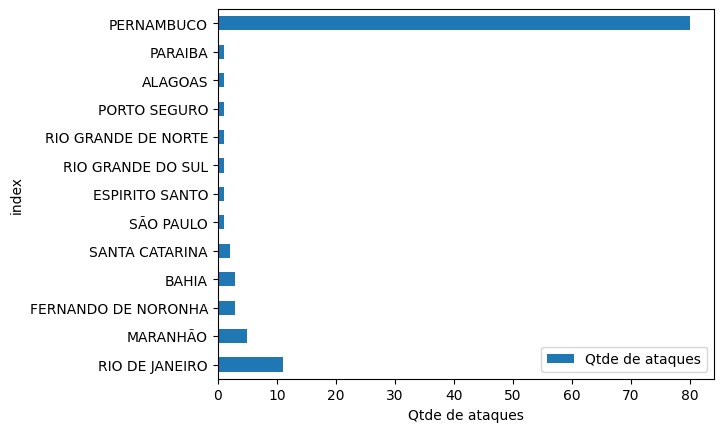

In [27]:
br_x_pe = pd.concat([br_ex_pe, pe])
ax = br_x_pe.plot(kind='barh')
ax.set_xlabel('Qtde de ataques')
ax.set_ylabel('index')
plt.show()

### **Number of attacks Brazil x World:**

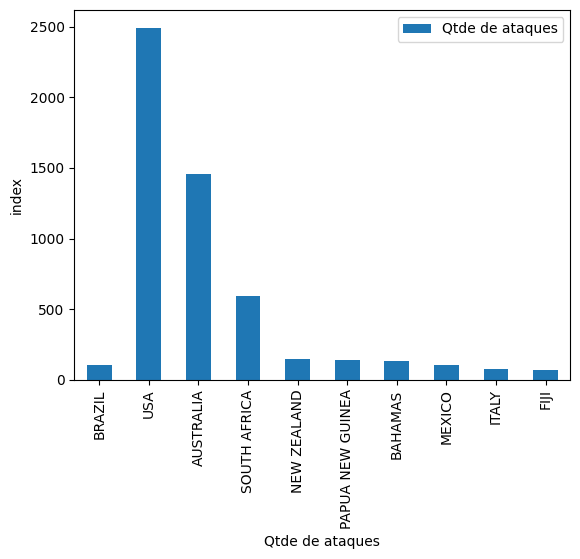

In [28]:
mundo_x_br = pd.concat([ataques_tot_br,ataques_tot_mundo])
ax_mundo = mundo_x_br.plot(kind='bar')
ax_mundo.set_xlabel('Qtde de ataques')
ax_mundo.set_ylabel('index')
plt.show()

### **Number of attacks in Pernambuco from 80 to 2023:**

<Axes: xlabel='index'>

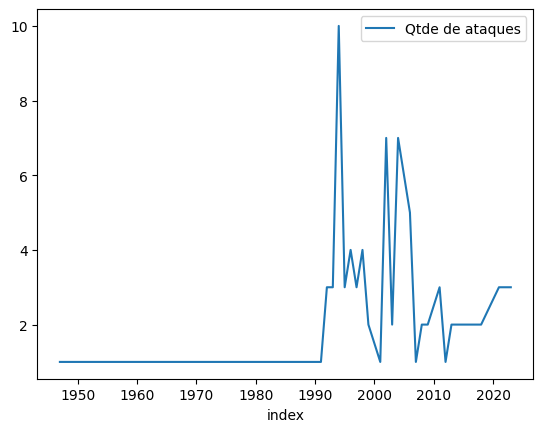

In [29]:
df_data['index'] = pd.to_datetime(df_data['index']).dt.year
df_data.groupby('index',as_index = False).sum().plot(kind= 'line',x='index', y = 'Qtde de ataques')

### **Amount of attacks after 90 works:**

<ipython-input-30-b143b861b2f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obras['index'] = pd.to_datetime(obras['index']).dt.year


<Axes: xlabel='index'>

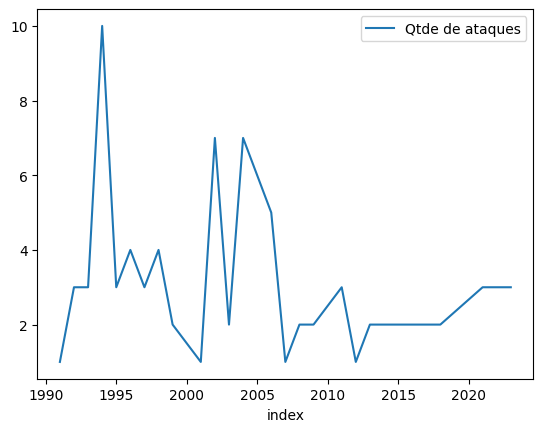

In [30]:
obras['index'] = pd.to_datetime(obras['index']).dt.year
obras.groupby('index',as_index = False).sum().plot(kind= 'line',x='index', y = 'Qtde de ataques')

## **Conclusion:**

### **Based on the analyzes carried out, we assume a relative increase in cases of attacks from the 1990s onwards. In addition to this unfutable hypothesis, I leave the following points to be considered below: The database used is international, and closer follow-up may be restricted. I need the cases, in view of the likely graphic feed based on cases that are reported in the international press. Understanding the limitation of the data, since the start date of records starts in the 80's very close to the date of works that this study proposes to analyze. There is a need for more robust and local data to complement the analysis.**